### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. -->

### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
gasturbine = pd.read_csv('gas_turbines (1).csv')

In [3]:
gasturbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
gasturbine.shape

(15039, 11)

## 1. EDA

In [5]:
gasturbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [6]:
gasturbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gasturbine.duplicated(subset=gasturbine.columns)

0        False
1        False
2        False
3        False
4        False
         ...  
15034    False
15035    False
15036    False
15037    False
15038    False
Length: 15039, dtype: bool

In [8]:
gasturbine['AT'].mean()

17.764381363787507

In [9]:
gasturbine.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


{'whiskers': [<matplotlib.lines.Line2D at 0x12db0fdd0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x12db0fdd760>,
 'boxes': [<matplotlib.lines.Line2D at 0x12daefc3d00>],
 'medians': [<matplotlib.lines.Line2D at 0x12db0fdde20>],
 'fliers': [<matplotlib.lines.Line2D at 0x12db0fe81c0>],
 'means': []}

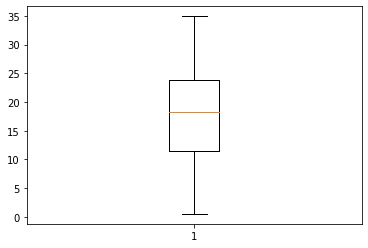

In [10]:
plt.boxplot(x='AT',data=gasturbine)

{'whiskers': [<matplotlib.lines.Line2D at 0x12db10ade80>,
 'caps': [<matplotlib.lines.Line2D at 0x12db10bc5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12db10adb20>],
 'medians': [<matplotlib.lines.Line2D at 0x12db10bcc70>],
 'fliers': [<matplotlib.lines.Line2D at 0x12db10bcfd0>],
 'means': []}

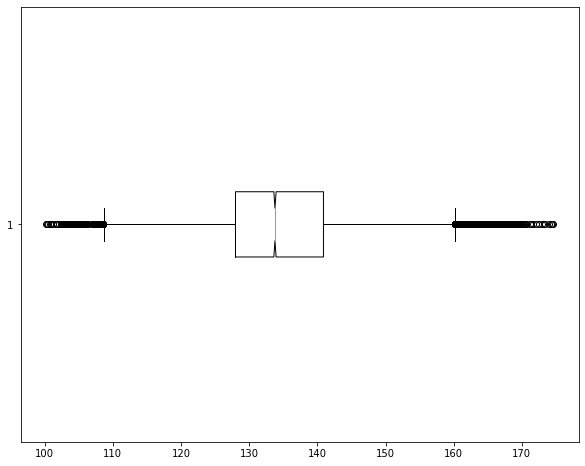

In [11]:
plt.figure(figsize=(10,8))
plt.boxplot(x='TEY',data=gasturbine,notch=True,vert=False)


<AxesSubplot:>

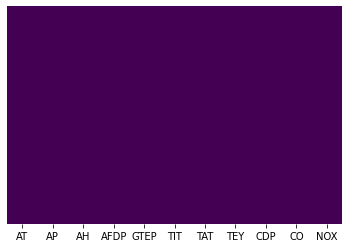

In [12]:
sns.heatmap(gasturbine.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## There is no null value .

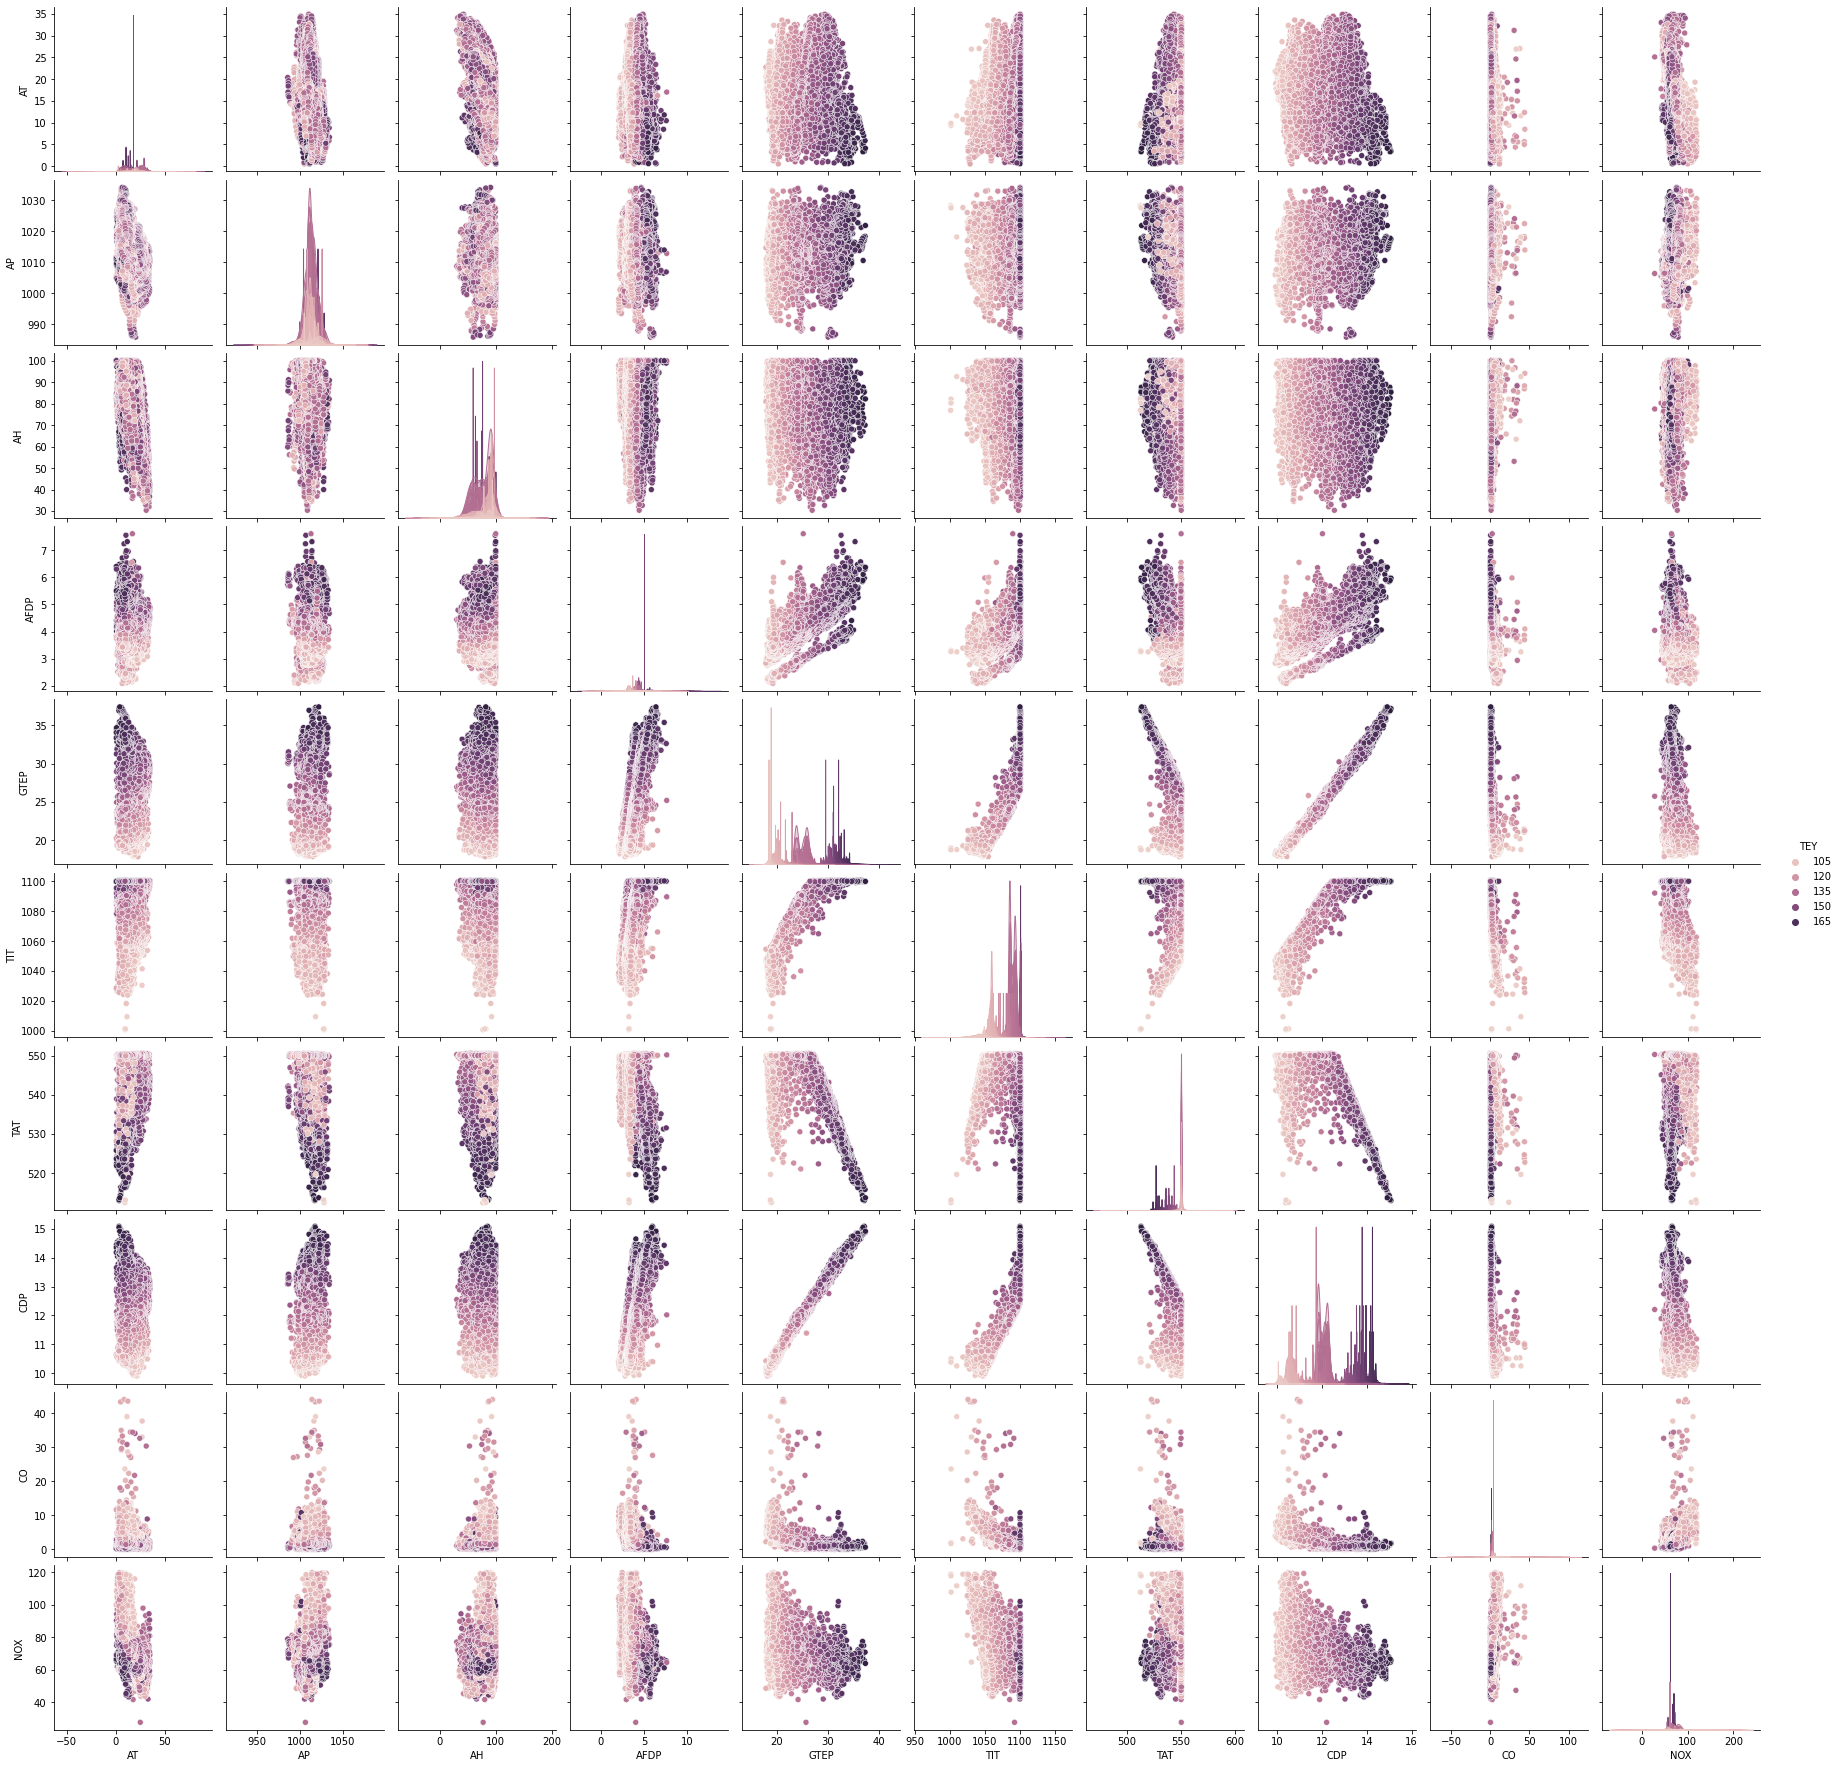

In [13]:
sns.pairplot(gasturbine,hue='TEY')

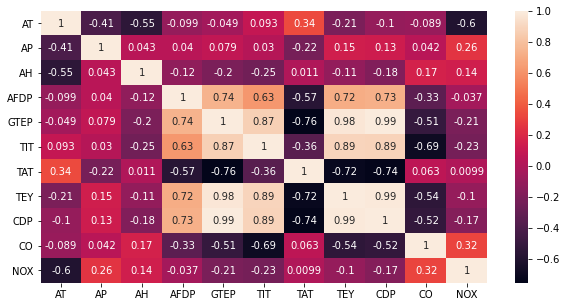

In [14]:
# Compute correlation between the variables
corr = gasturbine.corr()


plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

In [15]:
gasturbine.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

## There we see most corelation between TEY     1.000000 AND
### CDP     0.988473
### GTEP    0.977042
### TIT     0.891587
### AFDP    0.717995

## There we see less corelation between TEY
#### NOX    -0.102631
### AH     -0.110272
### *AT     -0.207495
#### CO     -0.541751
#### TAT    -0.720356


<AxesSubplot:>

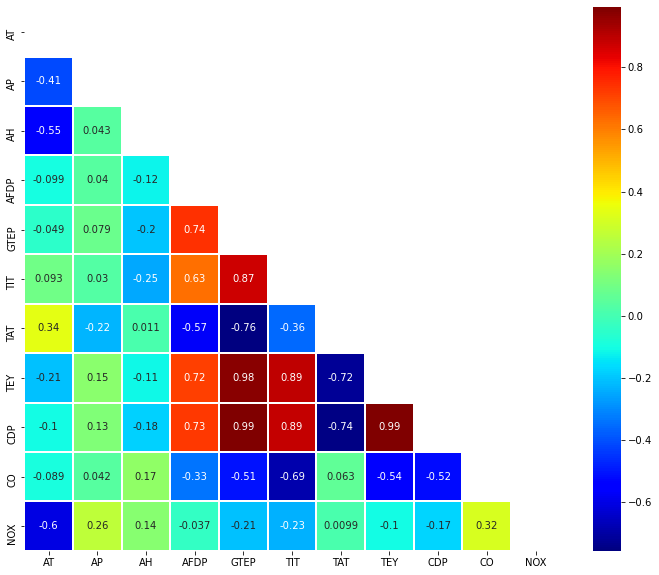

In [16]:
plt.figure(figsize=(12,10))
mask = np.zeros_like(gasturbine.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=gasturbine.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

Text(0.5, 1.0, 'Histogram of the Target Column')

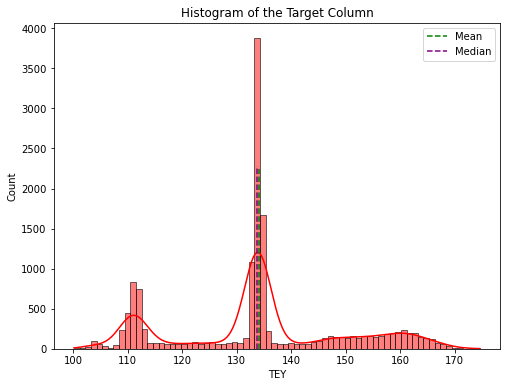

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(data=gasturbine,x="TEY",color="red",kde=True)
plt.axvline(x=gasturbine["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=gasturbine["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

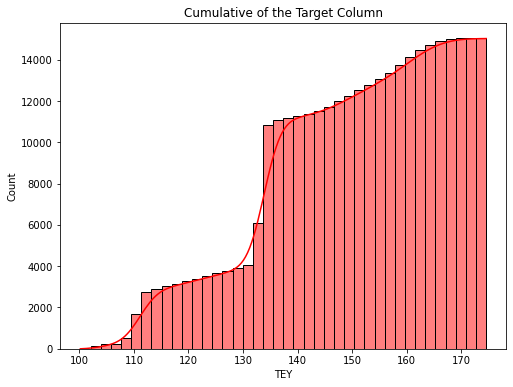

In [20]:
plt.figure(figsize = (8,6))
sns.histplot(gasturbine["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

## Split x and y 

In [23]:
X = gasturbine.drop("TEY", axis=1)
y = gasturbine["TEY"]
print(X)
print(y)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.7

# 2.PREPARING AND TRAINING THE MODEL

# We need to make feature scaling before feeding the data to artificial neural networks

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.28, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10828, 10)
(4211, 10)
(10828,)
(4211,)


In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
print(X_train)
print(X_test)

[[ 0.79382743 -1.39641993 -0.44567375 ... -1.38503804 -0.02364256
  -1.24988586]
 [ 1.14586769 -0.11506355 -1.56506453 ...  0.67372131 -0.49621804
  -0.18192578]
 [-0.80767807  0.04119942  0.540558   ... -1.47029063  0.67883147
   0.82277702]
 ...
 [-0.18783857  0.25996759 -0.21869482 ... -1.51473081  1.64798049
  -0.01083264]
 [-1.64095024  0.54124094  0.6653131  ... -1.46666286  1.44006896
   4.38116763]
 [-1.55618021  2.07261808  0.27518175 ... -0.37833193  0.10709715
   1.23245698]]
[[ 8.32575660e-01 -4.74468389e-01 -2.28982411e-01 ...  1.01440625e-01
  -3.13921458e-01 -6.92509290e-01]
 [ 3.50801547e-01  1.81836099e-01  8.32377698e-01 ... -1.19367319e+00
   3.26295569e-01 -1.10613681e+00]
 [ 3.25939199e-01 -1.15063551e-01  2.83295905e-01 ...  1.70949772e-02
  -1.20316474e-03 -3.09018035e-01]
 ...
 [-1.60397411e+00 -8.18246931e-01  1.00045657e+00 ... -1.41224631e+00
   1.87479307e+00  1.55837160e+00]
 [ 3.68919322e-01 -6.81846586e-02  7.17837743e-01 ... -6.63437276e-02
   6.25039627

## Building and Training the Neural Network Model


In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))

In [52]:
ann.compile(optimizer="adam",loss="mean_squared_error")

In [53]:
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

Epoch 1/100
339/339 [==============================] - 1s 3ms/step - loss: 17292.2031 - val_loss: 14746.3604
Epoch 2/100
339/339 [==============================] - 1s 2ms/step - loss: 9269.9541 - val_loss: 4665.6616
Epoch 3/100
339/339 [==============================] - 1s 2ms/step - loss: 2502.8315 - val_loss: 1018.1400
Epoch 4/100
339/339 [==============================] - 1s 2ms/step - loss: 624.0164 - val_loss: 436.8346
Epoch 5/100
339/339 [==============================] - 1s 3ms/step - loss: 367.2595 - val_loss: 327.1445
Epoch 6/100
339/339 [==============================] - 1s 3ms/step - loss: 285.9597 - val_loss: 259.6647
Epoch 7/100
339/339 [==============================] - 1s 3ms/step - loss: 227.3491 - val_loss: 204.0731
Epoch 8/100
339/339 [==============================] - 1s 2ms/step - loss: 179.6406 - val_loss: 159.4146
Epoch 9/100
339/339 [==============================] - 1s 3ms/step - loss: 141.4824 - val_loss: 124.2627
Epoch 10/100
339/339 [=========================

# 3.MAKING PREDICTIONS AND EVALUATING THE MODEL PERFORMANCE

In [54]:
pd.DataFrame(ann.history.history)

,loss,val_loss
0,17292.203125,14746.360352
1,9269.954102,4665.661621
2,2502.831543,1018.140015
3,624.016418,436.834625
4,367.259521,327.144531
5,285.959717,259.664673
6,227.349091,204.073059
7,179.640625,159.414566
8,141.482376,124.262657
9,111.302956,96.765869


<AxesSubplot:>

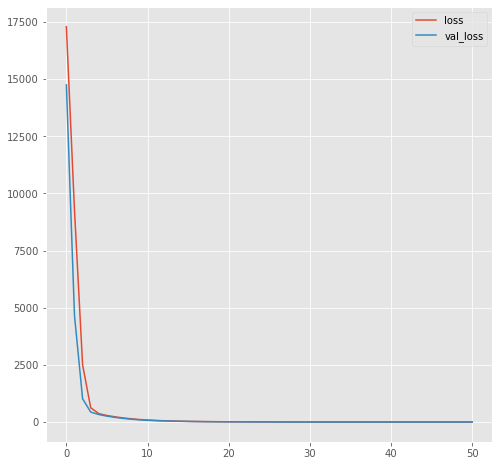

In [55]:
plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(8,8))

In [56]:
ann.evaluate(X_train,y_train)

339/339 [==============================] - 1s 2ms/step - loss: 0.5405


0.5404651761054993

In [57]:
ann.evaluate(X_test,y_test)

132/132 [==============================] - 0s 2ms/step - loss: 0.5132


0.5132132768630981

In [70]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(np.array(y_test),columns=["Real Values"]), predictions_df],axis=1)
comparison_df 


132/132 [==============================] - 0s 1ms/step


,Real Values,Predictions
0,134.46,134.864532
1,111.88,112.120979
2,133.72,134.342880
3,133.79,134.199875
4,110.77,110.773163
...,...,...
4206,109.38,109.607018
4207,133.85,134.979828
4208,112.71,112.486900
4209,133.72,133.126236


In [69]:
np.array(y_test)

array([134.46, 111.88, 133.72, ..., 112.71, 133.72, 150.98])

In [59]:
print(y_test.shape)       # The actual values are 1D arrays
print(predictions.shape)

(4211,)
(4211, 1)


Text(0, 0.5, 'Actual Values')

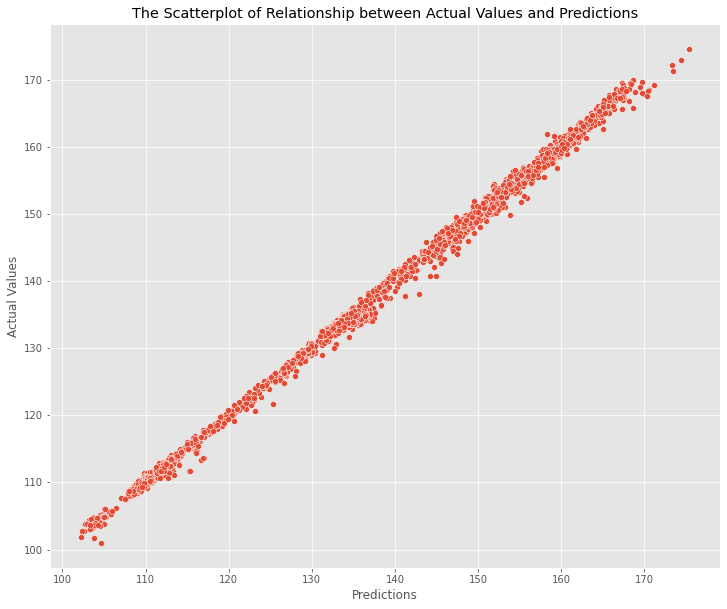

In [60]:
plt.figure(figsize=(12,10))
sns.scatterplot(np.ravel(predictions),y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")

In [68]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 0.5333536843522035
MSE: 0.5132131267195486
RMSE: 0.7163889493281904


In [72]:
print(metrics.explained_variance_score(y_test,predictions))

0.997962950721574


In [88]:
comparison_df

,Real Values,Predictions
0,134.46,134.864532
1,111.88,112.120979
2,133.72,134.342880
3,133.79,134.199875
4,110.77,110.773163
...,...,...
4206,109.38,109.607018
4207,133.85,134.979828
4208,112.71,112.486900
4209,133.72,133.126236


<AxesSubplot:ylabel='Density'>

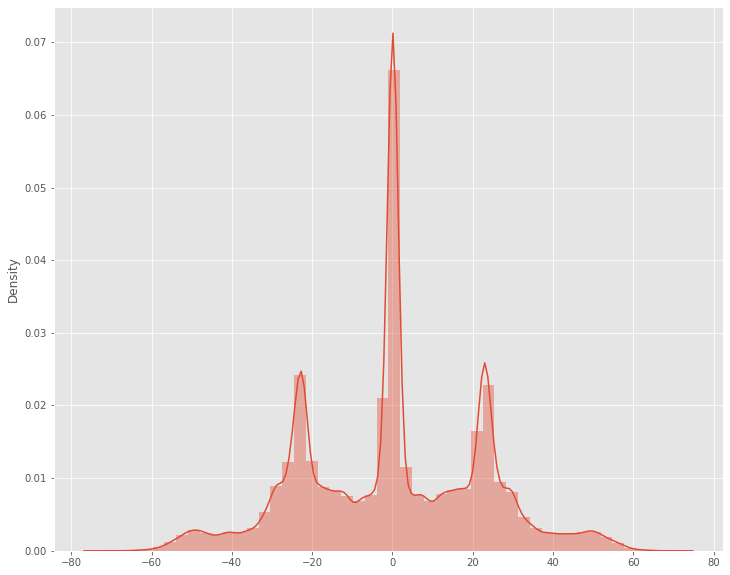

In [89]:
plt.figure(figsize=(12,10))
sns.distplot(np.array(y_test)-predictions,bins=50)